## MNIST 딥러닝 모델 예제

- 딥러닝을 처음 배우는 사람들이 만나게 되는 데이터셋 중 하나인 손으로 쓴 숫자들로 이루어진 이미지 데이터셋
- 아주 오래된 고전 데이터셋으로서 기계 학습 분야의 학습 및 테스트에 널리 사용되는 MNIST 데이터셋
- MNIST는 `keras.datasets`에 기본으로 포함되어 있음

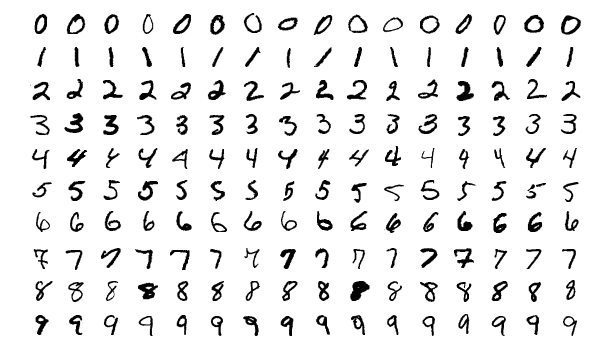

### 모듈 임포트

- 딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트
- 케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸을 사용할 수 있도록 `models`, `layers`, `optimizer`, `utils`를 임포트

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model

from keras.datasets.mnist import load_data

from sklearn.model_selection import train_test_split

### 데이터 로드 및 전처리

- 사용할 MNIST 데이터셋을 로드하기 위해서 케라스의 데이터셋에 내장되어 있는 `tensorflow.keras.datasets.mnist`를 임포트
- `train_test_split()` 함수를 이용해 학습용 데이터인 `x_train_full`와 `y_train_full`를 나누어서 70%는 학습용 데이터인 `x_train`와 `y_train`으로 사용하고, 30%는 검증 데이터인 `x_val`와 `y_val`로 사용
- 데이터셋이 어떻게 구성되었는지 출력해보면, 전체 60,000개의 학습 데이터 중에서 70%인 42,000개가 학습용 데이터로 나눠지고, 30%인 18,000개가 검증용 데이터로 나눠졌으며, 테스트용으로는 10,000개가 주어진 것을 알 수 있음

In [2]:
seed = 42

(x_train_full, y_train_full), (x_test, y_test) = load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=seed)

print(f"Total train data: {x_train_full.shape}, Target: {y_train_full.shape}")
print(f"Train data: {x_train.shape}, Target: {y_train.shape}")
print(f"Validation data: {x_val.shape}, Target: {y_val.shape}")
print(f"Test data: {x_test.shape}, Target: {y_test.shape}")

Total train data: (60000, 28, 28), Target: (60000,)
Train data: (42000, 28, 28), Target: (42000,)
Validation data: (18000, 28, 28), Target: (18000,)
Test data: (10000, 28, 28), Target: (10000,)


- MNIST 데이터셋에 실제 숫자 이미지가 어떻게 구성되어 있는지 60,000개 중에서 6개만 랜덤으로 `x_train_full`과 `y_train_full`에서 추출하여 표시

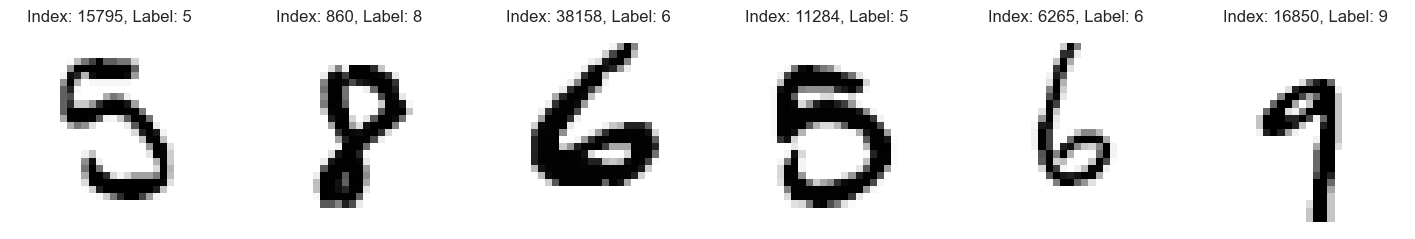

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

np.random.seed(seed)
n = 6
rand_n = np.random.randint(x_train.shape[0], size=n)

fig = plt.figure(figsize=(18, 6))

for i, idx in enumerate(rand_n):
  ax = fig.add_subplot(1, n, i + 1)
  ax.imshow(x_train[idx, :])
  ax.set_title(f"Index: {idx}, Label: {y_train[idx]}")
  ax.axis("off")

plt.show()

- MNIST의 학습용 데이터가 실제 값으로는 어떻게 구성되어있는지 출력을 해보면, `y_train`의 0번째는 4라는 값이 저장되어 있는걸 알 수 있고, `x_train`의 0번째에는 숫자 4에 대한 이미지를 0~255 사이의 값으로 표현

In [4]:
y_train[0]

7

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

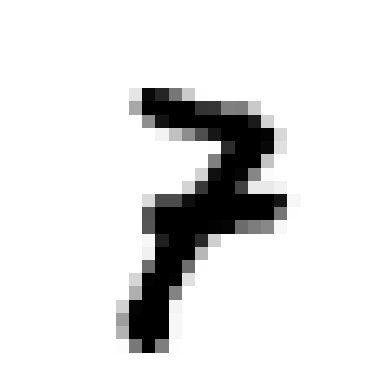

In [6]:
plt.imshow(x_train[0])
plt.grid(False)
plt.axis(False)

plt.show()

- MNIST 데이터셋을 가지고 본격적으로 딥러닝 모델에 사용하기 위해서는 전처리 과정이 필요
- 본 예제에서는 간단한 전처리만 사용해서 `x_train`, `x_val` 그리고 `x_test`의 값들을 255로 나누어줌
- 이미지의 픽셀이 표현하는 값의 범위가 0 ~ 255이기 때문에 최대값인 255로 나누어주면, 값이 0 ~ 1 사이의 범위로 스케일링되어 학습에 용이
- `y_train`, `y_val`, 그리고 `y_test`의 경우에는 0부터 9까지의 숫자를 나타내는 레이블이기 때문에 총 10개의 값을 가지는 범주형이므로 `utils.to_categorical`을 이용해 원-핫 인코딩을 수행

In [7]:
x_train_preprocessed, x_val_preprocessed, x_test_preprocessed = x_train / 255., x_val / 255., x_test / 255.
y_train_preprocessed = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_val_preprocessed = to_categorical(y_val, num_classes=len(np.unique(y_train)))
y_test_preprocessed = to_categorical(y_test, num_classes=len(np.unique(y_train)))

### 모델 구성

- 딥러닝 모델 구성을 위해서 `Sequential()` 함수를 이용해 순차적으로 레이어를 구성
- MNIST 데이터셋의 숫자 이미지가 28 x 28 사이즈를 사용하므로 입력 객체로 `keras.Input`를 사용할 때, `shape`을 `(28, 28)`로 지정
- 1차원으로 쭉 펼쳐주는 `layers.Flatten` 레이어를 사용하여 입력 데이터 모양이 2차원인 28 x 28 크기를 1차원으로 784 크기를 갖도록 변형
- 이후 레이어로 `layers.Dense`를 여러겹 사용하여 유닛수를 100, 64, 32, 10으로 4겹 쌓아주고, 활성화 함수로 `relu`를 사용
- 여기서 MNIST의 숫자가 0부터 9까지 총 10개 이므로 마지막 레이어에서는 전체 카테고리의 수인 10을 유닛수로 지정하고, 활성화 함수는 `softmax`를 사용하여 각 카테고리별 확률 값을 구함

In [8]:
inp = Input(shape=(x_train_preprocessed.shape[1], x_train_preprocessed.shape[2]), name="Input")
flatten = Flatten(input_shape=(inp.shape), name="Flatten")(inp)
hidden_1 = Dense(100, activation="relu", name="Dense_1")(flatten)
hidden_2 = Dense(64, activation="relu", name="Dense_2")(hidden_1)
hidden_3 = Dense(32, activation="relu", name="Dense_3")(hidden_2)
out = Dense(10, activation="softmax", name="Output")(hidden_3)

model = Model(inputs=inp, outputs=out)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense_1 (Dense)             (None, 100)               78500     
                                                                 
 Dense_2 (Dense)             (None, 64)                6464      
                                                                 
 Dense_3 (Dense)             (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.

- 생성한 모델의 구성을 그림을 통해 확인

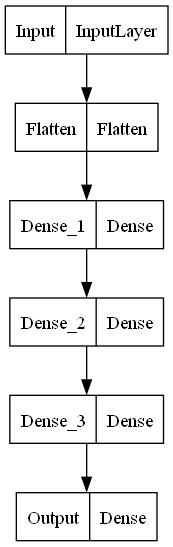

In [9]:
plot_model(model)

- 모델의 구성을 각 레이어의 모양까지 함께 살펴보도록 함

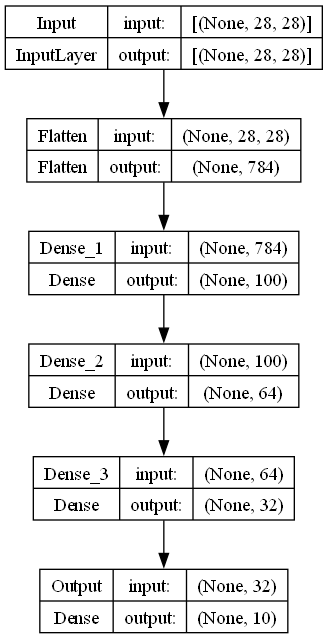

In [10]:
plot_model(model, show_shapes=True)

### 모델 컴파일 및 학습

- 구성한 모델에 손실 함수로는 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 `categorical_crossentropy`를 지정
- 옵티마이저는 가장 기본적인 `sgd`를 지정
- 분류에 대한 성능을 확인하기 위한 지표로 `accuracy`를 지정

In [11]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["acc"]
)

- 딥러닝 모델을 학습하기 위해 `fit()`을 실행시키는데, 이때 학습에 사용되는 데이터로 `x_train`과 `y_train`을 지정
- 학습을 반복하는 에폭 수(`epochs`)는 40으로 지정하며, 배치 사이즈(`batch_size`)는 128로 지정
- 검증을 위해서 나누었던 데이터로 `x_val`와 `y_val`을 지정

In [13]:
from keras.callbacks import EarlyStopping

early_stop_cb = EarlyStopping(
    patience=10,
    monitor="val_acc",
    restore_best_weights=True
)

history = model.fit(
    x_train_preprocessed, y_train_preprocessed,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_preprocessed, y_val_preprocessed),
    callbacks=[early_stop_cb]
)

Epoch 1/100
329/329 [==============================] - 2s 4ms/step - loss: 0.4465 - acc: 0.8757 - val_loss: 0.2085 - val_acc: 0.9376
Epoch 2/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1709 - acc: 0.9488 - val_loss: 0.1458 - val_acc: 0.9578
Epoch 3/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1218 - acc: 0.9642 - val_loss: 0.1265 - val_acc: 0.9625
Epoch 4/100
329/329 [==============================] - 1s 3ms/step - loss: 0.0934 - acc: 0.9718 - val_loss: 0.1185 - val_acc: 0.9638
Epoch 5/100
329/329 [==============================] - 1s 3ms/step - loss: 0.0759 - acc: 0.9759 - val_loss: 0.1212 - val_acc: 0.9628
Epoch 6/100
329/329 [==============================] - 1s 3ms/step - loss: 0.0598 - acc: 0.9818 - val_loss: 0.0968 - val_acc: 0.9714
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 0.0479 - acc: 0.9847 - val_loss: 0.1045 - val_acc: 0.9705
Epoch 8/100
329/329 [==============================] - 1s 3ms/step - 

In [14]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

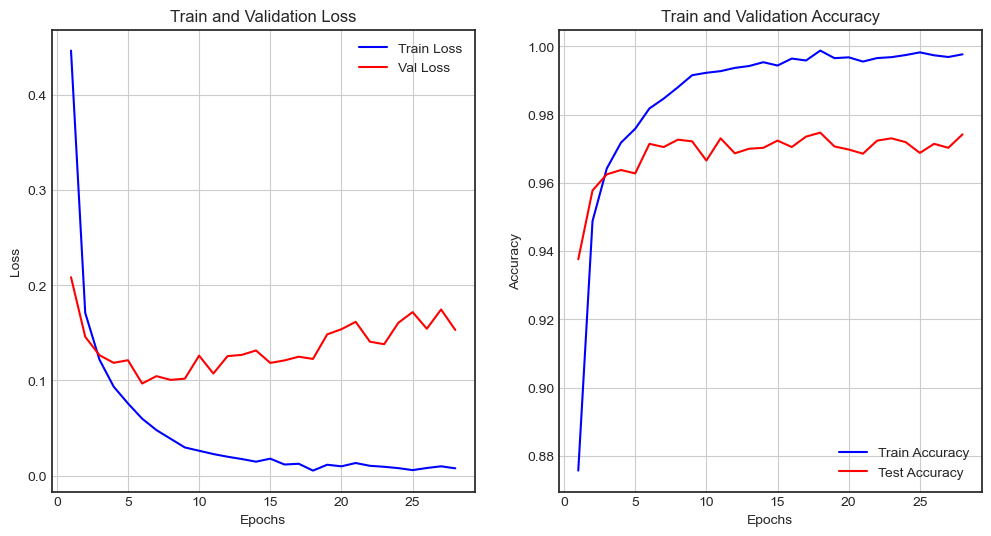

In [15]:
hist_dict = history.history

fig = plt.figure(figsize=(12, 6))

loss = hist_dict["loss"]
val_loss = hist_dict["val_loss"]
epochs = range(1, len(loss) + 1)

ax_1 = fig.add_subplot(1, 2, 1)
ax_1.plot(epochs, loss, color="blue", label="Train Loss")
ax_1.plot(epochs, val_loss, color="red", label="Val Loss")
ax_1.set_title("Train and Validation Loss")
ax_1.set_xlabel("Epochs")
ax_1.set_ylabel("Loss")
ax_1.grid(True)
ax_1.legend()

acc = hist_dict["acc"]
val_acc = hist_dict["val_acc"]

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.plot(epochs, acc, color="blue", label="Train Accuracy")
ax_2.plot(epochs, val_acc, color="red", label="Test Accuracy")
ax_2.set_title("Train and Validation Accuracy")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("Accuracy")
ax_2.grid(True)
ax_2.legend()

plt.show()

In [16]:
model.evaluate(x_test_preprocessed, y_test_preprocessed)

313/313 [==============================] - 0s 1ms/step - loss: 0.1139 - acc: 0.9772


[0.11385472118854523, 0.9771999716758728]

In [17]:
y_pred = model.predict(x_test_preprocessed)

print(y_pred.shape)
print(y_pred[0])

313/313 [==============================] - 0s 1ms/step
(10000, 10)
[9.8345543e-10 6.8119165e-12 1.3313309e-09 6.5082799e-07 5.3614143e-14
 1.5983492e-10 1.6653891e-15 9.9999940e-01 4.9699933e-10 5.9613900e-09]


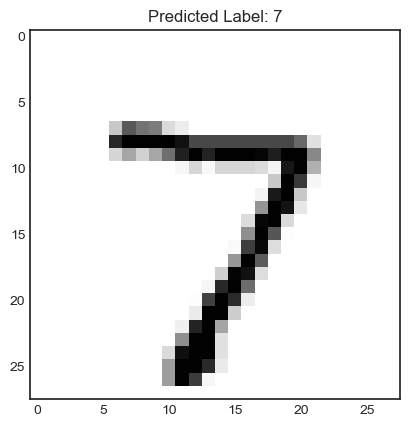

In [18]:
arg_y_pred = np.argmax(y_pred, axis=1)

plt.imshow(x_test[0])
plt.title(f"Predicted Label: {arg_y_pred[0]}")
plt.grid(False)

plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



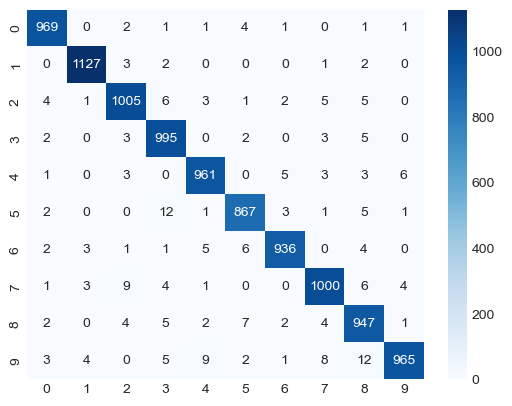

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.show()